In [254]:
import pandas as pd
data=pd.read_csv("update_rentdata_26102016.csv",sep=",")

In [45]:
print data.columns

Index([u'propertyCode', u'thumbnail', u'numPhotos', u'floor', u'price',
       u'propertyType', u'operation', u'size', u'exterior', u'rooms',
       u'bathrooms', u'address', u'province', u'municipality', u'district',
       u'country', u'neighborhood', u'latitude', u'longitude', u'showAddress',
       u'url', u'distance', u'hasVideo', u'newDevelopment', u'tenantNumber',
       u'tenantGender', u'hasLift', u'isSmokingAllowed', u'priceByArea'],
      dtype='object')


In [33]:
data[40:60]

,propertyCode,thumbnail,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,...,showAddress,url,distance,hasVideo,newDevelopment,tenantNumber,tenantGender,hasLift,isSmokingAllowed,priceByArea
40,34952601,https://img3.idealista.com/thumbs?wi=140&he=10...,10,3,1300.0,flat,rent,80.0,True,2,...,False,http://www.idealista.com/34952601,1726,False,False,NaN,NaN,True,NaN,16.0
41,34952556,https://img3.idealista.com/thumbs?wi=140&he=10...,13,4,825.0,flat,rent,67.0,True,3,...,False,http://www.idealista.com/34952556,4630,False,False,NaN,NaN,False,NaN,12.0
42,34952554,https://img3.idealista.com/thumbs?wi=140&he=10...,11,1,800.0,flat,rent,74.0,False,3,...,False,http://www.idealista.com/34952554,3416,False,False,NaN,NaN,True,NaN,11.0
43,34952547,https://img3.idealista.com/thumbs?wi=140&he=10...,9,4,1300.0,flat,rent,75.0,True,2,...,False,http://www.idealista.com/34952547,1811,False,False,NaN,NaN,True,NaN,17.0
44,34952516,https://img3.idealista.com/thumbs?wi=140&he=10...,14,1,800.0,flat,rent,100.0,True,3,...,False,http://www.idealista.com/34952516,3524,False,False,NaN,NaN,True,NaN,8.0
45,34952515,https://img3.idealista.com/thumbs?wi=140&he=10...,11,2,1300.0,flat,rent,88.0,True,2,...,False,http://www.idealista.com/34952515,1785,False,False,NaN,NaN,True,NaN,15.0
46,34952512,https://img3.idealista.com/thumbs?wi=140&he=10...,9,1,1300.0,flat,rent,80.0,True,2,...,False,http://www.idealista.com/34952512,1707,False,False,NaN,NaN,True,NaN,16.0
47,34952500,https://img3.idealista.com/thumbs?wi=140&he=10...,12,1,785.0,flat,rent,31.0,True,1,...,False,http://www.idealista.com/34952500,2655,False,False,NaN,NaN,False,NaN,25.0
48,34952490,https://img3.idealista.com/thumbs?wi=140&he=10...,20,2,490.0,flat,rent,55.0,True,2,...,False,http://www.idealista.com/34952490,25258,False,False,NaN,NaN,False,NaN,9.0
49,34952442,https://img3.idealista.com/thumbs?wi=140&he=10...,24,2,1300.0,flat,rent,80.0,True,2,...,False,http://www.idealista.com/34952442,1543,True,False,NaN,NaN,True,NaN,16.0


In [255]:
data=data[data['propertyCode']!='propertyCode']
# esto elimina los indices de las filas eliminadas--> hay que arreglarlo

In [234]:
print np.unique(data['tenantGender'])

[nan]


In [235]:
print np.unique(data['tenantNumber'])

[nan]


In [256]:
data = data.drop(['thumbnail', 'address','url','tenantGender','tenantNumber','isSmokingAllowed'], axis=1)

In [67]:
data.columns

Index([u'propertyCode', u'numPhotos', u'floor', u'price', u'propertyType',
       u'operation', u'size', u'exterior', u'rooms', u'bathrooms', u'province',
       u'municipality', u'district', u'country', u'neighborhood', u'latitude',
       u'longitude', u'showAddress', u'distance', u'hasVideo',
       u'newDevelopment', u'hasLift', u'priceByArea'],
      dtype='object')

In [258]:
import re
pattern='^\d'
data['floor']=data['floor'].fillna(value='1000')
llista=[]
for element in tuple(data['floor']):
    f=bool(re.match(pattern,element))
    if f==False:
        llista=np.append(llista,element)
#print llista
for i in np.unique(llista):
    data[data['floor']==i]='0'

In [259]:
tofloat=['price','priceByArea','numPhotos','size','propertyCode','distance','rooms','floor']
for col in tofloat:
    data[col]=data[col].astype(float)

In [261]:
data[data['floor']==1000]=np.nan

In [265]:
data['floor'].dtype

dtype('float64')

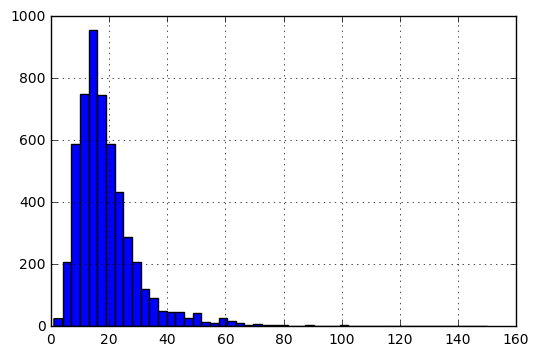

In [132]:
import matplotlib.pyplot as plt
plt.figure()
#data['priceByArea'].plot(kind='hist')
data['priceByArea'].hist(bins=50)
plt.show()

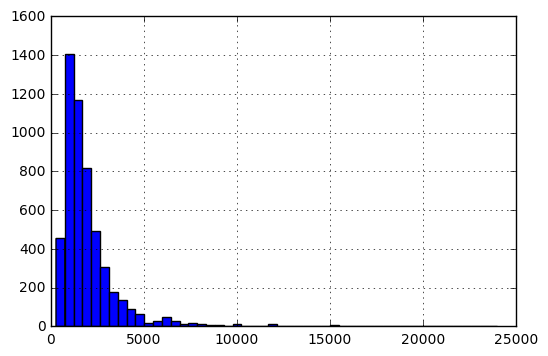

In [139]:
plt.figure()
data['price'].hist(bins=50)
plt.show()

In [151]:
print len(np.unique(data['district']))
print len(np.unique(data['neighborhood']))

132
111


In [152]:
for i in np.unique(data['district']):
    print i, len(data[data['district']==i])

nan 0
Almeda 1
Ametllers-Poble Sec 1
Artigas - Llefià 10
Arxius 10
Baixador 5
Barceloneta - Molí d'En Rovira 10
Barri Antic - Centre 3
Bellamar 9
Bellaterra 14
Bellvitge 5
Bufalà 11
Ca n'Oriac - Torreguitart 7
Camps Blancs - Casablanca - Canons 1
Camí de la Serra 7
Can Alzamora - Les Torres - Can Fatjó 2
Can Bou 1
Can Cuiàs 1
Can Feu - Arraona 13
Can Matas 8
Can Pallàs - Can Llobateras 1
Can Pantiquet 1
Can Quirze 3
Can Roca-Muntanyeta 5
Can Sant Joan 3
Can Serra - Pubilla Cases 12
Caneletes-Turonet 1
Casagemes - Canyadó 4
Castellnou - Can Mir 4
Centre 110
Centre - Casco Antiguo 2
Centre - Colomeres - Ramblas 8
Centre - Estació 8
Centre - Mercat 4
Centre Vila 2
Centre-Cordelles 1
Centro Pueblo 9
Cerdanyola 2
Ciutat Vella 888
Coll Favà - Can Magí 1
Collblanc 13
Congost - Can Gili - Estació del Nord 4
Eixample 1024
El Castell-Poble Vell 6
El Poal 9
Els Molins-Observatorio-Pins Vens 5
Escorxador 5
Estació de França - Estació del Nord 2
Fondo 2
Fontetes-La Farigola 3
Fontsanta 1
Gavà Mar 2

In [166]:
data[data['neighborhood']=='NaN']

,propertyCode,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,...,country,neighborhood,latitude,longitude,showAddress,distance,hasVideo,newDevelopment,hasLift,priceByArea


In [170]:
data['neighborhood']

0                   Sant Gervasi - La Bonanova
1                                     El Raval
2                                          NaN
3                                          NaN
4              El Poble Sec - Parc de Montjuïc
5                                     La Salut
6                                          NaN
7                               Vila de Gràcia
8                                       Sarrià
9                   Sant Gervasi - La Bonanova
10                                         NaN
11                   Vallcarca i els Penitents
12          El Camp d'En Grassot i Gràcia Nova
13             El Poble Sec - Parc de Montjuïc
14                                         NaN
15                             Les Tres Torres
16             L'Antiga Esquerra de l'Eixample
17                                         NaN
18                                         NaN
19                                      Sarrià
20      Sant Pere - Santa Caterina i la Ribera
21           

In [202]:
#data.groupby('neighborhood').mean()

In [182]:
np.unique(data['floor'])

array([nan, '-1', '1', '10', '11', '12', '13', '14', '15', '16', '18',
       '19', '2', '20', '21', '22', '24', '25', '3', '4', '5', '6', '7',
       '8', '9', 'bj', 'en', 'ss'], dtype=object)

In [183]:
data[isnumber(data['neighborhood'])!=True]=0

NameError: name 'isnumber' is not defined

In [199]:
data['floor']

0         2
1         3
2        bj
3         5
4         3
5         4
6         4
7        bj
8         3
9        en
10        2
11        1
12        2
13        3
14        1
15        7
16        3
17      NaN
18        3
19        4
20        4
21        2
22      NaN
23      NaN
24        3
25        4
26        7
27        1
28        2
29       bj
       ... 
5426      4
5427    NaN
5428      4
5429      2
5430      1
5431      1
5432      5
5433      1
5434      1
5435      5
5436      6
5437     bj
5438      2
5439    NaN
5440    NaN
5441    NaN
5442      6
5443      8
5444      1
5445     bj
5446      1
5447      2
5448      4
5449    NaN
5450      7
5451    NaN
5452      7
5453      1
5454      2
5455      1
Name: floor, dtype: object

In [241]:
data['floor']=data['floor'].fillna(value='1000')

In [245]:
data['floor']

0          2
1          3
2         bj
3          5
4          3
5          4
6          4
7         bj
8          3
9         en
10         2
11         1
12         2
13         3
14         1
15         7
16         3
17      1000
18         3
19         4
20         4
21         2
22      1000
23      1000
24         3
25         4
26         7
27         1
28         2
29        bj
        ... 
5430       1
5431       1
5432       5
5433       1
5434       1
5435       5
5436       6
5437      bj
5438       2
5439    1000
5440    1000
5441    1000
5442       6
5443       8
5444       1
5445      bj
5446       1
5447       2
5448       4
5449    1000
5450       7
5451    1000
5452       7
5453       1
5454       2
5455       1
bj         0
en         0
-1         0
ss         0
Name: floor, dtype: object